
UNSUPERVISED LEARNING - CLUSTERING

--------------------------------------------------
K-means Clustering
--------------------------------------------------


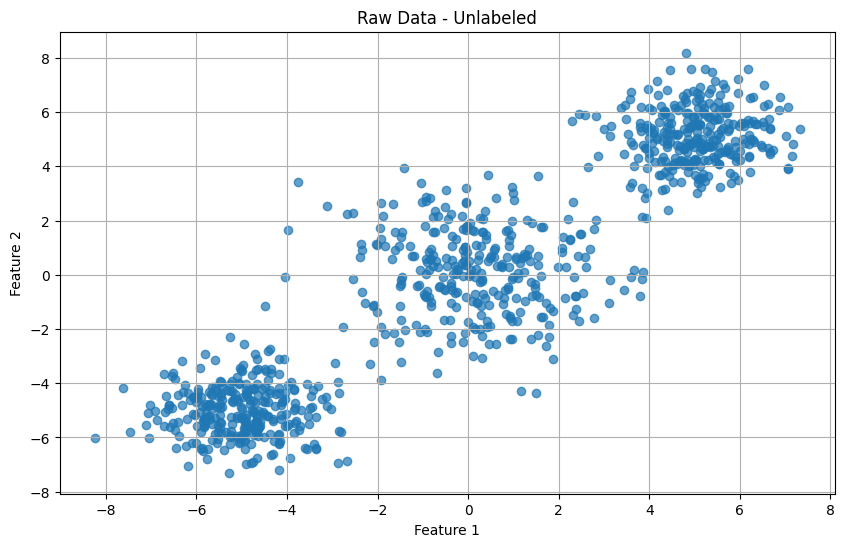

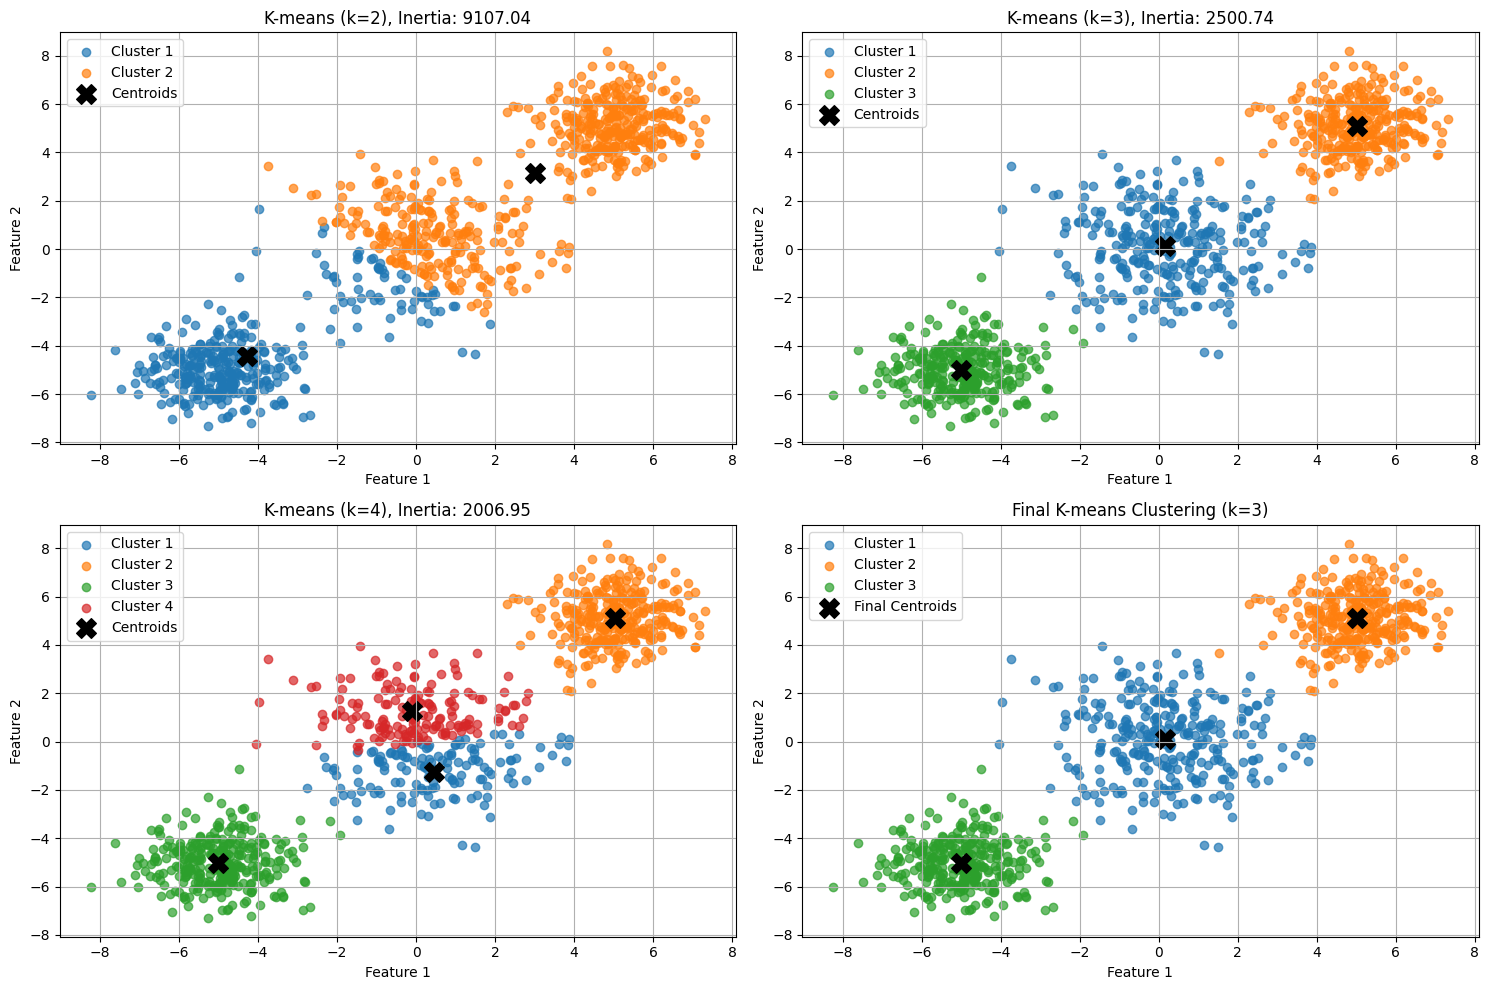

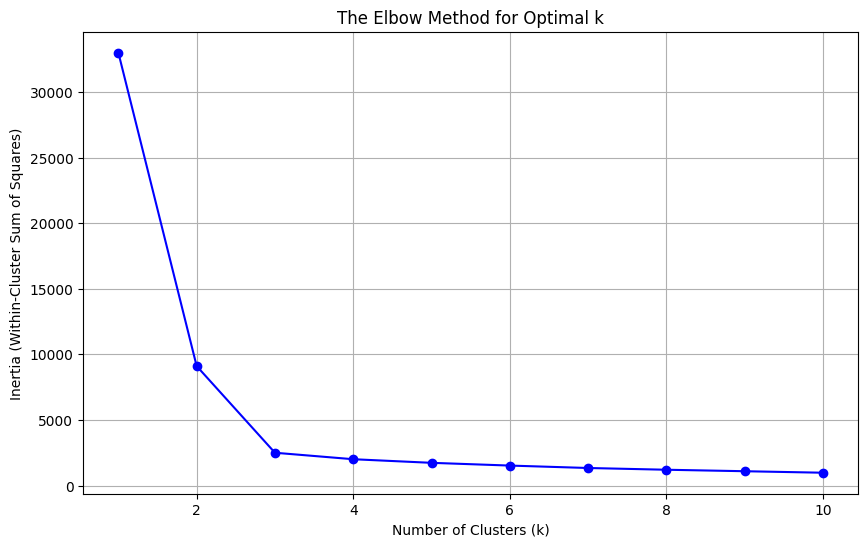


Observations on K-means Clustering:
1. K-means separates data into k clusters by minimizing the within-cluster variance.
2. The algorithm iteratively assigns points to the nearest centroid and updates centroids.
3. The optimal k can be determined using the Elbow Method - look for where the curve bends.
4. For this synthetic dataset, k=3 is optimal (as we would expect from how we generated it).
5. K-means weaknesses: sensitive to initialization, assumes spherical clusters, requires specifying k.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("\n" + "=" * 50)
print("UNSUPERVISED LEARNING - CLUSTERING")
print("=" * 50)

print("\n" + "-" * 50)
print("K-means Clustering")
print("-" * 50)

def kmeans_example():
    """
    Demonstrates K-means clustering on a synthetic dataset.

    K-means is an unsupervised learning algorithm that groups data into k clusters
    by minimizing the variance within each cluster.
    """
    # Generate synthetic data with 3 clusters
    np.random.seed(42)
    n_samples = 300

    # Create 3 clusters with different centers and variances
    centers = [(-5, -5), (0, 0), (5, 5)]
    stds = [1, 1.5, 1]

    X = np.vstack([
        np.random.normal(centers[0][0], stds[0], n_samples).reshape(-1, 1),
        np.random.normal(centers[0][1], stds[0], n_samples).reshape(-1, 1),
        np.random.normal(centers[1][0], stds[1], n_samples).reshape(-1, 1),
        np.random.normal(centers[1][1], stds[1], n_samples).reshape(-1, 1),
        np.random.normal(centers[2][0], stds[2], n_samples).reshape(-1, 1),
        np.random.normal(centers[2][1], stds[2], n_samples).reshape(-1, 1)
    ]).T.reshape(-1, 2)

    # Reshape to have 3 clusters of n_samples points each
    X = X.reshape(3*n_samples, 2)

    # Visualize the raw data
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
    plt.title('Raw Data - Unlabeled')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

    # Apply K-means clustering
    k_values = [2, 3, 4]

    plt.figure(figsize=(15, 10))

    for i, k in enumerate(k_values):
        # Initialize and fit the K-means model
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)

        # Get the cluster centers
        centers = kmeans.cluster_centers_

        # Calculate inertia (within-cluster sum of squares)
        inertia = kmeans.inertia_

        # Visualize the clusters
        plt.subplot(2, 2, i+1)

        for j in range(k):
            plt.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1],
                      label=f'Cluster {j+1}', alpha=0.7)

        # Plot the cluster centers
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')

        plt.title(f'K-means (k={k}), Inertia: {inertia:.2f}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)

    # Visualize K-means algorithm steps for k=3
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

    # Initialize centroids using k-means++ initialization
    #kmeans.cluster_centers_ = kmeans._init_centroids(X, 3, random_state=np.random.RandomState(42))
    #old_centers = kmeans.cluster_centers_.copy()

    # Simulate 5 iterations (normally k-means runs until convergence)
    plt.subplot(2, 2, 4)

    # Get final cluster assignments
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Plot final clustering
    for j in range(3):
        plt.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1],
                  label=f'Cluster {j+1}', alpha=0.7)

    # Plot final centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              c='black', s=200, marker='X', label='Final Centroids')

    plt.title('Final K-means Clustering (k=3)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot the Elbow Method to find the optimal k
    max_k = 10
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('The Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

    print("\nObservations on K-means Clustering:")
    print("1. K-means separates data into k clusters by minimizing the within-cluster variance.")
    print("2. The algorithm iteratively assigns points to the nearest centroid and updates centroids.")
    print("3. The optimal k can be determined using the Elbow Method - look for where the curve bends.")
    print("4. For this synthetic dataset, k=3 is optimal (as we would expect from how we generated it).")
    print("5. K-means weaknesses: sensitive to initialization, assumes spherical clusters, requires specifying k.")

# Run the example
kmeans_example()
